<a href="https://colab.research.google.com/github/Sak608/CodSoft_Task1/blob/main/Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
df = pd.read_csv('kaggle_movie_train.csv')

In [30]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [31]:
df.shape

(22579, 3)

In [32]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


Visualizing the count of 'genre' column from the dataset

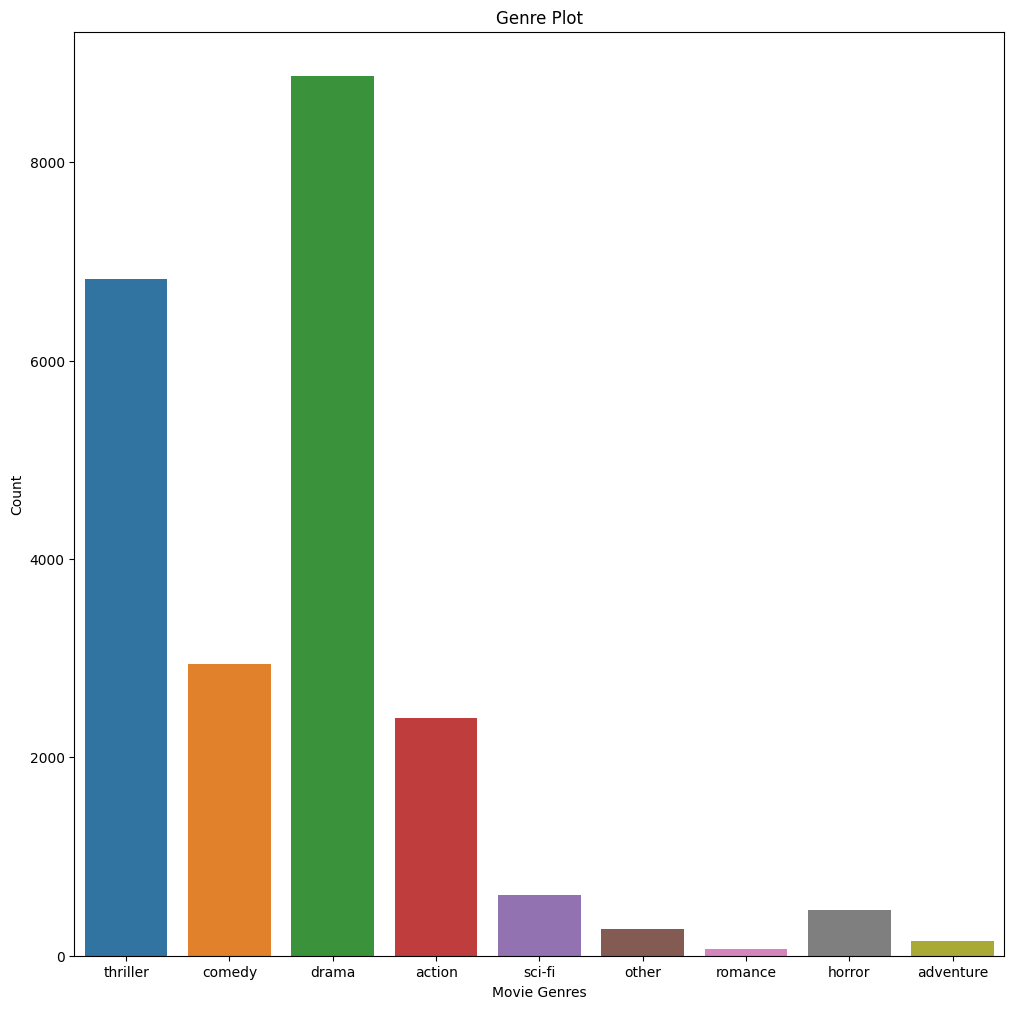

In [33]:
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

Data Cleaning and Preprocessing

In [34]:
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [35]:
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3,
                'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [36]:
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [37]:
df.drop('id', axis=1, inplace=True)

Cleaning the Text

In [39]:
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):
    dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i]) # Cleaning special character from the dialog/script
    dialog = dialog.lower() # Converting the entire dialog/script into lower case
    words = dialog.split() # Tokenizing the dialog/script by words
    dialog_words = [word for word in words if word not in set(stopwords.words('english'))] # Removing the stop words
    words = [ps.stem(word) for word in dialog_words] # Stemming the words
    dialog = ' '.join(words) # Joining the stemmed words
    corpus.append(dialog) # Creating a corpus

In [41]:
corpus[0:2]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [43]:
len(corpus)

22579

In [44]:
drama_words = []
for i in list(df[df['genre']==4].index):
    drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
    action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
    comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
    drama += drama_words[i]
    action += action_words[i]
    comedy += comedy_words[i]

Creating wordcloud for drama genre

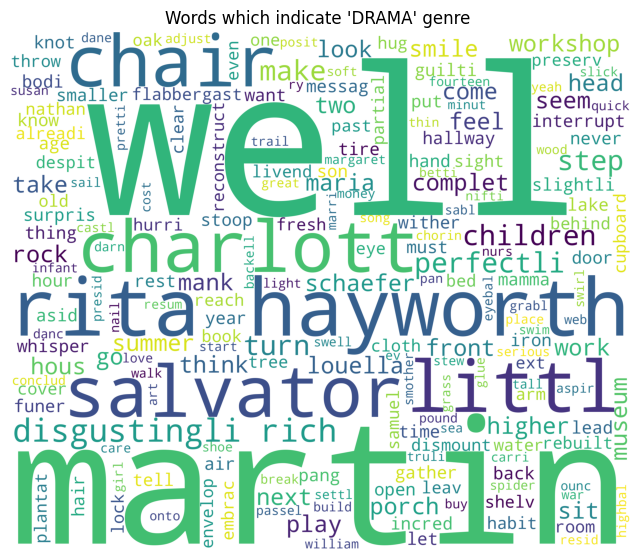

In [46]:
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

Creating wordcloud for action genre

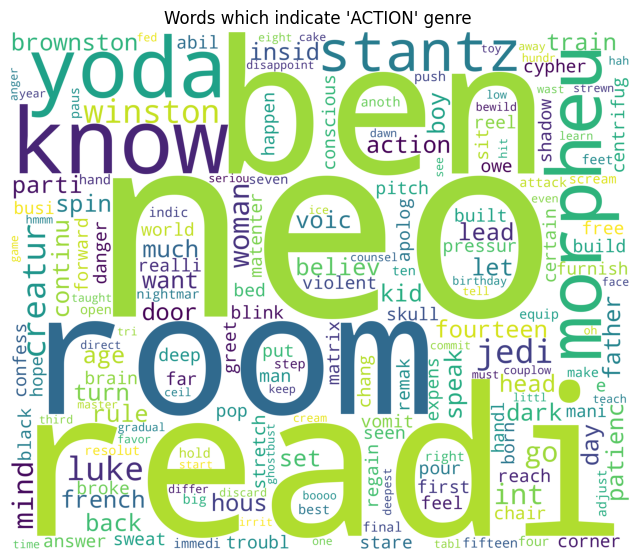

In [47]:
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

creating word cloud for comedy genre

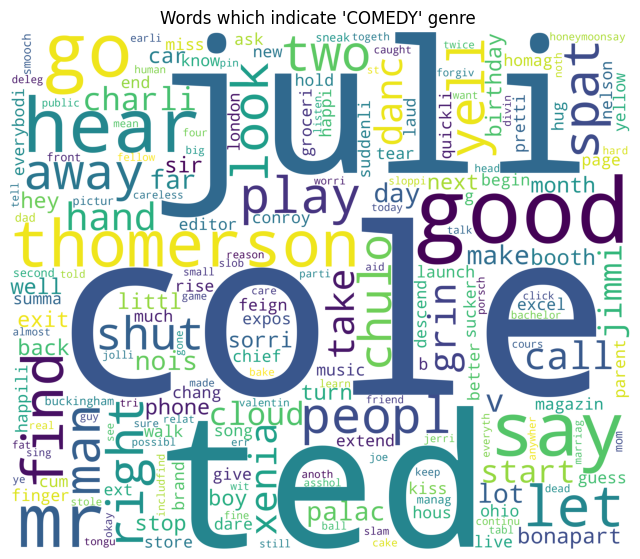

In [48]:
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

Creating the bag of wwords model

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [51]:
y = df['genre'].values

Model Building

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


Fitting Naive Bayes to the Training set

In [53]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

Predicting the Test Results

In [54]:
nb_y_pred = nb_classifier.predict(X_test)

Calculating Accuracy

In [55]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.57%


Prediction

In [56]:
def genre_prediction(sample_script):
    sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
    sample_script = sample_script.lower()
    sample_script_words = sample_script.split()
    sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_script = [ps.stem(word) for word in sample_script_words]
    final_script = ' '.join(final_script)
    temp = cv.transform([final_script]).toarray()
    return nb_classifier.predict(temp)[0]

Loading Test data

In [58]:
test = pd.read_csv('kaggle_movie_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [60]:
test.shape

(5589, 2)

In [61]:
test.drop('id', axis=1, inplace=True)

Predictiing values

In [65]:
from random import randint
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: ning structural damage. GWEN Guys, we're sustaining structural damage!... JASON Faster Tommy. Get us out of here! TOMMY It's as far as it goes! GUY They're still behind us... JASON We should have a turbo. I'm always saying activate turbo boosters , right?... TOMMY Could be this. JASON Push It. Hold it down. He pushes the turbo. The ship begins to VIBRATE. COMPUTER The enemy is matching velocity. GWEN The enemy is matching velocity. ALEXANDER We heard it the first time! GWEN Shit! I'm doing it! I'm repeating the damn computer! Suddenly an image of Fred down in the generator room appears on the side viewscreen. He's taking it all in stride. FRED Hi guys. Listen, they're telling me that the generators won't take it, the ship's breaking apart and all that. Just FYI. The viewscreen goes black. The ship ROARS forward. ALEXANDER We've got to stop! JASON We stop we die. Keep holding the thruster down Tommy! ALEXANDER You don't hold a thruster down! It's for quick boosts JASON Like YOU 